In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [2]:
dt=pd.read_csv("StudentsPerformance.csv")
dt.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [3]:
dt.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 1. Find out how many males and females participated in the test.

In [60]:
# Total no. of females and males in the data 
dt["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [56]:
# no. of males and females participated in the test
male=dt[(dt["test preparation course"]=="completed") & (dt["gender"]=="male")].value_counts().sum()
female=dt[(dt["test preparation course"]=="completed") & (dt["gender"]=="female")].value_counts().sum()
print("No. of males participated  in the test =",male)
print("No. of females participated in the test =",female)

No. of males participated  in the test = 174
No. of females participated in the test = 184


## 2. Students' parental level of education

In [25]:
dt["parental level of education"].unique()

array(['some high school', 'high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [26]:
dt["parental level of education"].nunique()

6

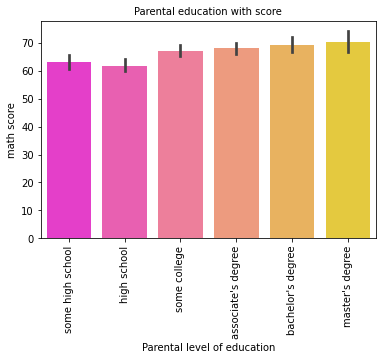

In [27]:
sns.barplot(x="parental level of education",y="math score",data=dt,palette="spring")
plt.xlabel("Parental level of education")
plt.ylabel("math score")
plt.title("Parental education with score",size=10)
plt.xticks(rotation=90)
plt.show()

#### DATA INSIGHT
The highest average of maths score is for the children of parents with masters degree. 

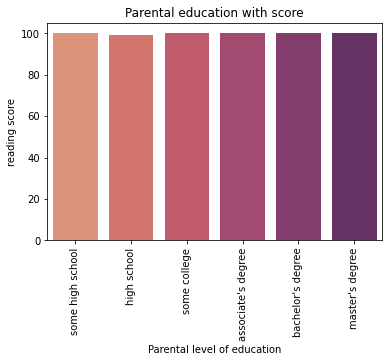

In [28]:
sns.barplot(x="parental level of education",y="reading score",data=dt,estimator=np.max,ci=None,palette="flare")
plt.xlabel("Parental level of education")
plt.ylabel("reading score")
plt.title("Parental education with score")
plt.xticks(rotation=90)
plt.show()

#### DATA INSIGHT
The maximum marks scored in reading is the same for different level of parental education.Only a small change in value for high school category.The data also show an independent relation of parental education in consideration with maximum mark.

In [29]:
dt.groupby("parental level of education")["writing score"].describe()

,count,mean,std,min,25%,50%,75%,max
parental level of education,,,,,,,,
associate's degree,222.0,70.031532,14.260787,35.0,58.25,71.5,80.0,100.0
bachelor's degree,118.0,73.381356,14.728262,38.0,62.50,74.0,83.0,100.0
high school,196.0,62.403061,14.165172,15.0,52.00,64.0,73.0,100.0
master's degree,59.0,75.677966,13.730711,46.0,67.00,75.0,85.0,100.0
some college,226.0,69.035398,15.089911,19.0,60.00,70.0,79.0,99.0
some high school,179.0,64.888268,15.736197,10.0,54.00,66.0,77.0,100.0




#### DATA INSIGHT
In consideration with writing score,the highest minimum mark is for children of parents with masters degree of education eventnough they belong to the less number.

## 3. Who scores the most on average for math, reading and writing 

### a) Based on Gender

In [30]:
dt.groupby(["gender"]).agg(["mean"])

,math score,reading score,writing score
,mean,mean,mean
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


#### DATA INSIGHT
* The average score for maths only is highest for males.
* The highest average score for both reading and writing are scored by females.

### a) Based on Test preparation course

In [31]:
dt.groupby(["test preparation course"]).agg(["mean"])

,math score,reading score,writing score
,mean,mean,mean
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


#### DATA INSIGHT
* The average for maths,reading and writing based on test preparation of course is higher for females.

## 4. What do you think about the scoring variation for math, reading and writing


### a) Based on Gender 

In [32]:
dt.groupby(["gender"]).agg(["min","median","max"])


math score             reading score             writing score         \
              min median  max           min median  max           min median   
gender                                                                         
female          0     65  100            17     73  100            10     74   
male           27     69  100            23     66  100            15     64   

             
        max  
gender       
female  100  
male    100

#### DATA INSIGHT
* The minimum score obtained in all these categories is less for females than compared to that of males.
* Both the genders scored the maximum limit score for all the categories.
* The range between the scores for maths,reading,writing are more for females than males.

### b) Test preparation course

In [33]:

dt.groupby(["test preparation course"]).agg(["min","median","max"])


math score             reading score              \
                               min median  max           min median  max   
test preparation course                                                    
completed                       23     70  100            37     75  100   
none                             0     64  100            17     67  100   

                        writing score              
                                  min median  max  
test preparation course                            
completed                          36     76  100  
none                               10     65  100

#### DATA INSIGHT
* The students who have completed the test preparation course have better minimum marks compared to that of others who has not.
* It can also inferred that even the students who has not undertaken the course have scored the maximum score for all the         categories.
* The median of those who undertaken the course is higher than others.




##  5.  Top 25% of students based on their maths score


In [34]:
#total no.of students
tot=dt["gender"].value_counts().sum()
print("Total no. of students=",tot)

Total no. of students= 1000


In [35]:
# since the total number of students is 1000,top 25% includes the top 250 students
dt.nlargest(250,["math score"]).head(250)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
515,female,group E,some college,standard,none,100,92,97
516,female,group E,bachelor's degree,standard,none,100,100,100
517,female,group E,associate's degree,standard,none,100,100,100
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86
429,female,group E,some high school,standard,none,77,79,80
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64



#### DATA INSIGHT
* The maximum math score scored by the top 25%  is 100.
* The minimum math score scored by the top 25%  is 77.
* Even both categories of test preparation course students are included among the top 25%.